In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import re

In [3]:
df = pd.read_json('Sentiment_anlysis_file.json')

In [4]:
df

,retweet_count,transformed_text
0,318,rt laysphilippines great news lay 100 plastic ...
1,2,rt livemint india initially introduce covid va...
2,2,rt hallamhri us next shu internal hallamhri me...
3,3,rt thetrialfiles trial track https
4,0,israeli doctor believes caught omicron london ...
...,...,...
795,130,rt garethicke never meant end fourth fifth jab...
796,35,rt wsvn man surgery wins 1 million lottery pri...
797,398,rt 4dynastyrich wall street secret elon musk s...
798,1,rt worcsts allergyalert nutrisure ltd recalls ...


In [5]:
df.drop(columns=['retweet_count'],inplace=True)

In [6]:
df

,transformed_text
0,rt laysphilippines great news lay 100 plastic ...
1,rt livemint india initially introduce covid va...
2,rt hallamhri us next shu internal hallamhri me...
3,rt thetrialfiles trial track https
4,israeli doctor believes caught omicron london ...
...,...
795,rt garethicke never meant end fourth fifth jab...
796,rt wsvn man surgery wins 1 million lottery pri...
797,rt 4dynastyrich wall street secret elon musk s...
798,rt worcsts allergyalert nutrisure ltd recalls ...


In [7]:
#Columns renames
df.rename(columns = {'transformed_text':'text'}, inplace = True)

In [8]:
df

,text
0,rt laysphilippines great news lay 100 plastic ...
1,rt livemint india initially introduce covid va...
2,rt hallamhri us next shu internal hallamhri me...
3,rt thetrialfiles trial track https
4,israeli doctor believes caught omicron london ...
...,...
795,rt garethicke never meant end fourth fifth jab...
796,rt wsvn man surgery wins 1 million lottery pri...
797,rt 4dynastyrich wall street secret elon musk s...
798,rt worcsts allergyalert nutrisure ltd recalls ...


In [9]:
#Data cleaning
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #Remove @mention
    text = re.sub(r'#','',text) # Revoe the # symbol
    text = re.sub(r'rt[\s]+','',text) # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text) # Remove the Hyper link
    
    return text

In [10]:
df['text'] = df['text'].apply(cleantext)

In [11]:
df

,text
0,laysphilippines great news lay 100 plastic neu...
1,livemint india initially introduce covid vacci...
2,hallamhri us next shu internal hallamhri metho...
3,thetrialfiles trial track https
4,israeli doctor believes caught omicron london ...
...,...
795,garethicke never meant end fourth fifth jab fi...
796,wsvn man surgery wins 1 million lottery prize ...
797,4dynastyrich wall street secret elon musk seri...
798,worcsts allergyalenutrisure ltd recalls natury...


## Word Cloud

In [12]:
wc = WordCloud(width=900,height=800,min_font_size=10,background_color='white')

In [13]:
wc_text = wc.generate(df['text'].str.cat(sep = " "))

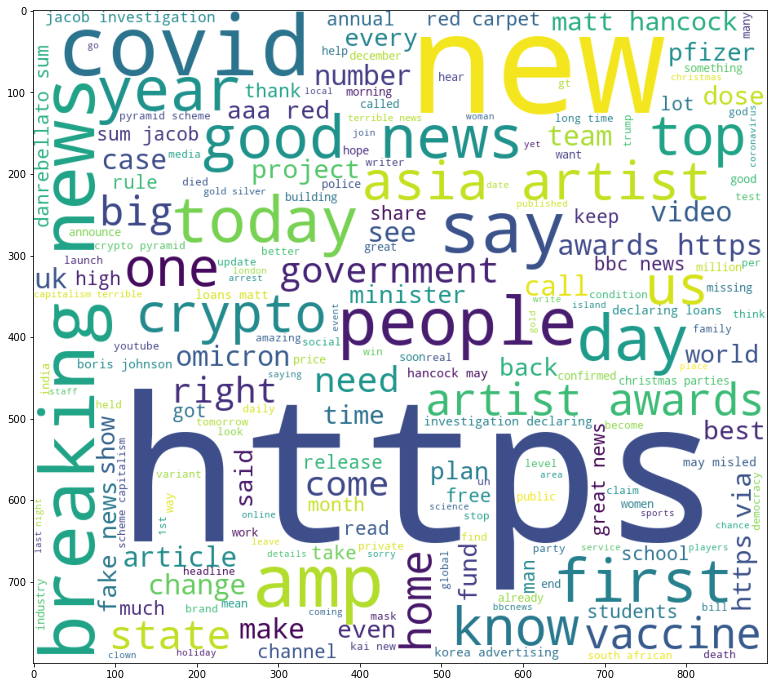

In [14]:
plt.figure(figsize=(16,12))
plt.imshow(wc_text)
plt.show()

In [16]:
corpus = []
for msg in df['text'].tolist():
    for word in msg.split():
        corpus.append(word)

In [17]:
len(corpus)

8278

In [18]:
Counter(corpus).most_common(25)

[('https', 504),
 ('news', 235),
 ('new', 47),
 ('2021', 39),
 ('covid', 38),
 ('breaking', 31),
 ('amp', 29),
 ('good', 25),
 ('people', 23),
 ('one', 23),
 ('awards', 23),
 ('today', 21),
 ('says', 21),
 ('crypto', 21),
 ('christmas', 20),
 ('first', 19),
 ('said', 19),
 ('omicron', 18),
 ('time', 18),
 ('vaccine', 17),
 ('day', 17),
 ('bbc', 16),
 ('year', 16),
 ('may', 16),
 ('world', 16)]

In [19]:
pd.DataFrame(Counter(corpus).most_common(25),columns=['word','Frequency'])

,word,Frequency
0,https,504
1,news,235
2,new,47
3,2021,39
4,covid,38
5,breaking,31
6,amp,29
7,good,25
8,people,23
9,one,23


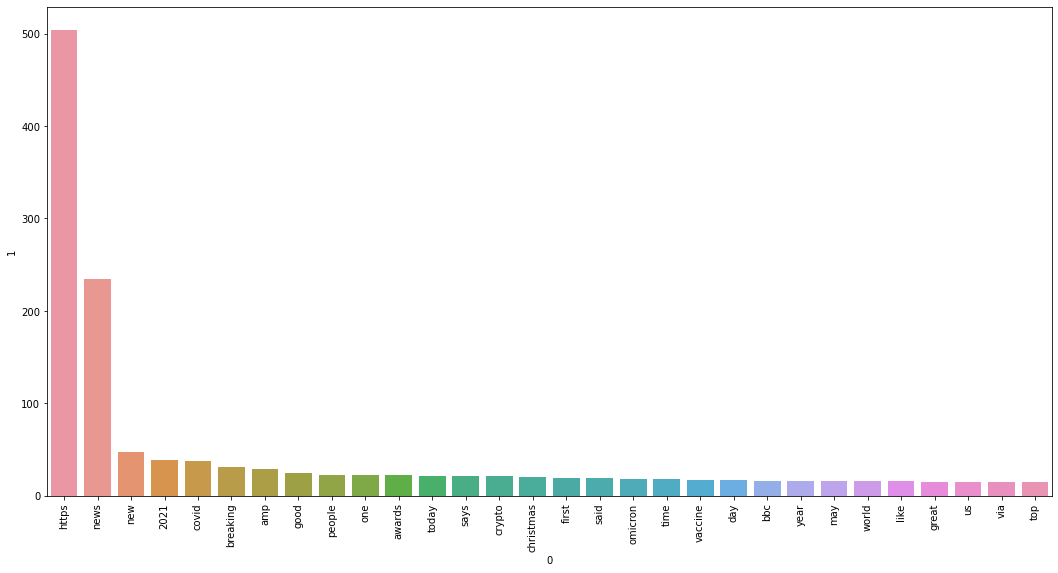

In [20]:
plt.figure(figsize=(18,9))
sns.barplot(pd.DataFrame(Counter(corpus).most_common(30))[0],pd.DataFrame(Counter(corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [21]:
df

,text
0,laysphilippines great news lay 100 plastic neu...
1,livemint india initially introduce covid vacci...
2,hallamhri us next shu internal hallamhri metho...
3,thetrialfiles trial track https
4,israeli doctor believes caught omicron london ...
...,...
795,garethicke never meant end fourth fifth jab fi...
796,wsvn man surgery wins 1 million lottery prize ...
797,4dynastyrich wall street secret elon musk seri...
798,worcsts allergyalenutrisure ltd recalls natury...


In [22]:
from textblob import TextBlob 

In [23]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Polarity'] = df['text'].apply(getPolarity)

In [24]:
df

,text,Polarity
0,laysphilippines great news lay 100 plastic neu...,0.400000
1,livemint india initially introduce covid vacci...,0.000000
2,hallamhri us next shu internal hallamhri metho...,0.133333
3,thetrialfiles trial track https,0.000000
4,israeli doctor believes caught omicron london ...,0.000000
...,...,...
795,garethicke never meant end fourth fifth jab fi...,0.000000
796,wsvn man surgery wins 1 million lottery prize ...,0.300000
797,4dynastyrich wall street secret elon musk seri...,-0.366667
798,worcsts allergyalenutrisure ltd recalls natury...,1.000000


In [25]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [26]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [27]:
df

,text,Polarity,Analysis
0,laysphilippines great news lay 100 plastic neu...,0.400000,Positive
1,livemint india initially introduce covid vacci...,0.000000,Neutral
2,hallamhri us next shu internal hallamhri metho...,0.133333,Positive
3,thetrialfiles trial track https,0.000000,Neutral
4,israeli doctor believes caught omicron london ...,0.000000,Neutral
...,...,...,...
795,garethicke never meant end fourth fifth jab fi...,0.000000,Neutral
796,wsvn man surgery wins 1 million lottery prize ...,0.300000,Positive
797,4dynastyrich wall street secret elon musk seri...,-0.366667,Negative
798,worcsts allergyalenutrisure ltd recalls natury...,1.000000,Positive


### Print all of the positive Tweets

In [29]:
j=1
sorted_df = df.sort_values(by = ['Polarity'])
for i in range(0,sorted_df.shape[0]):
    if(sorted_df['Analysis'][i] == 'Positive'):
        print(str(j) + ')' + sorted_df['text'][i])
        print()
        j = j + 1

1)laysphilippines great news lay 100 plastic neutral means every pack buy equal amount plastic

2)hallamhri us next shu internal hallamhri methodology seminar wednesday confirmed speaker

3)financialombuds published today action plan change improve organisation provide best service

4)jingo82943256 breaking news think secure unconditional release mazinnamdikanu stop

5)lili4lisaa hope 2022 year full good news blessings vote mamavote lisa

6)bdlivesa breaking news couorders fresh decision hold ramaphosa vote confidence https

7)customer discovered 350 lego set missing pieces company response brilliant https

8)isnttony105 breaking news painted bathroom put new shower curtain installed first aid kit cupboard

9)omicron cases evidence suggest vaccines may less effective

10)pandemic bengal logs 12 deaths 668 fresh cases state covid tally also mounted https

11)news mazi nnamdi kanu arraigned federal high couabuja tomorrow 2nd december

12)ariss contact scheduled students hino elementary s

### Print all of the Negative Tweets

In [30]:
j=1
sorted_df = df.sort_values(by = ['Polarity'],ascending='False')
for i in range(0,sorted_df.shape[0]):
    if(sorted_df['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_df['text'][i])
        print()
        j = j + 1

1)died scene little brother rushed hospital https

2)wildhyperbole macron calls bojo un clown creates phoney wars mask brexit chaos private says sorry act

3)unhcr described britain new immigration legislation recipe mental physical ill health https

4)guitarworld steel panther still searching new bassist need help narrow field candidates https

5)myvoice03 exactly point seiyirathellam senjitu ithu task ku sonna athu wrong either accept news trp

6)andreasharsono japan officially condemns myanmar coup slowly normalizes contact military junta instead

7)drjohnb2 https almost people usual died conditions unrelated coronavirus since july

8)alasdairmack66 failures immigration amp asylum system remedied harsher penalties amp dangerous enforcement

9)electric cars already threatened poor charging infrastructure warns smmt https https

10)fake news misinformation thrived western media another one coming cnn https

11)victim azeen ahmed scooter believed lost balance negotiating bad https

12)

### Print all of the Neutral Tweets

In [31]:
j=1
sorted_df = df.sort_values(by = ['Polarity'],ascending='False')
for i in range(0,sorted_df.shape[0]):
    if(sorted_df['Analysis'][i] == 'Neutral'):
        print(str(j) + ')' + sorted_df['text'][i])
        print()
        j = j + 1

1)livemint india initially introduce covid vaccine 7 states details https https

2)thetrialfiles trial track https

3)israeli doctor believes caught omicron london 23 november https

4)thesinankose tell supposed fear british equivalent fox news taking bbc place

5)kenroth mar 14 myanmar security forces deliberately kettled protesters surrounding trapping killing

6)qso today virtual ham expo call speakers presentations qso today virtual ham expo return https

7)channel cowboys saints today schedule time nfl night football week 13 nfl https

8)2021 got scammed times rugs exit scams etc https

9)chicago drops lawsuit police union fight vaccine mandate city employees https

10)suffolk coastal mp therese coffey warned people avoid snogging mistletoe christmas parties https

11)macron accused sowing division comment brexit deal https via mailonline

12)four groups arizona state university want kyle rittenhouse described couproceedings https

13)ankitpr84927630 lalantop news stand students j

In [34]:
## get Percentage Positive Tweets

ptweets = df[df.Analysis =='Positive']
ptweets = ptweets['text']

## get Percentage negative Tweets

ntweets = df[df.Analysis =='Negative']
ntweets = ntweets['text']

## get Percentage neutal Tweets

n_tweets = df[df.Analysis =='Neutral']
n_tweets = n_tweets['text']

print("Positive Tweets: ",round((ptweets.shape[0]/df.shape[0])*100,1))
print("Negative Tweets: ",round((ntweets.shape[0]/df.shape[0])*100,1))
print("  Neutal Tweets: ",round((n_tweets.shape[0]/df.shape[0])*100,1))

Positive Tweets:  39.1
Negative Tweets:  13.8
  Neutal Tweets:  47.1


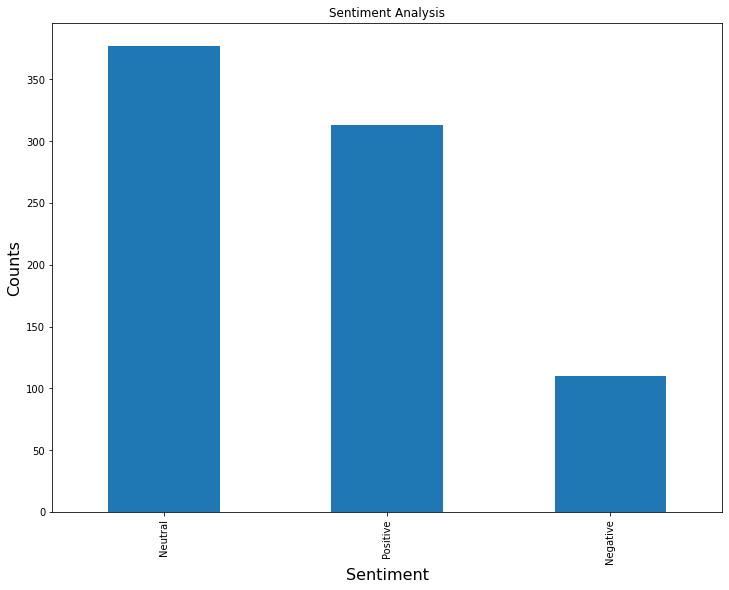

In [35]:
plt.figure(figsize=(12,9))
df['Analysis'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment',size = 16)
plt.ylabel('Counts',size = 16)
plt.show()